Using the old model prior to meeting to verify the recreation of the results.

In [1]:
import sys
sys.path.append("..")
import importlib
import numpy as np
import matplotlib.pyplot as plt
import qutip

import system.theoretical2pi as system
importlib.reload(system)
import utils.solver as solver
importlib.reload(solver)
import pulse.tukey as pulse_gen
importlib.reload(pulse_gen)
import utils.expectation_values as expect
importlib.reload(expect)

pass

13.956375210674434
4.35


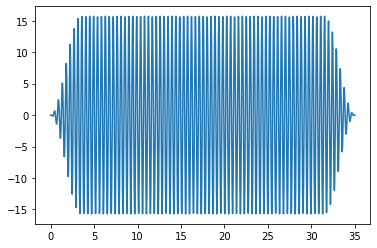

In [21]:
offset = 0.2257142857142857
drive_frequency = (system.first_energy_spacing/3 - offset)/2*np.pi
tlist = np.linspace(0, 35, 2000)
print(drive_frequency)
print(system.first_energy_spacing/ (2*np.pi))
pulse_gen.setup(amplitude=2.5*2*np.pi, drive_frequency= drive_frequency, ramp_coef=0.2, tlist=tlist)
plt.plot(tlist, pulse_gen.get_pulse(tlist))

In [15]:
# tlist = np.linspace(0, 1000, 1000*10)
# solution = solver.time_evolve(H_d=system.H0, H_c=system.H1, pertubation_func=pulse_gen.pulse_func, tlist=tlist, starting_state=system.basis_states[0], pbar=True)

tlist = np.linspace(0, 35, int(20000*2))
pulse_gen.setup(amplitude=2.5 * 2 * np.pi, drive_frequency= system.first_energy_spacing/3 - 0.20061224489795917, ramp_coef=0.2, tlist=tlist)
solution = solver.time_evolve(H_d=system.H0, H_c=system.H1, pertubation_func=pulse_gen.pulse_func, tlist=tlist, starting_state=(system.basis_states[0]), pbar=False)
expectation_values = expect.get_all_expectation_values(solution.states, system.basis_states)


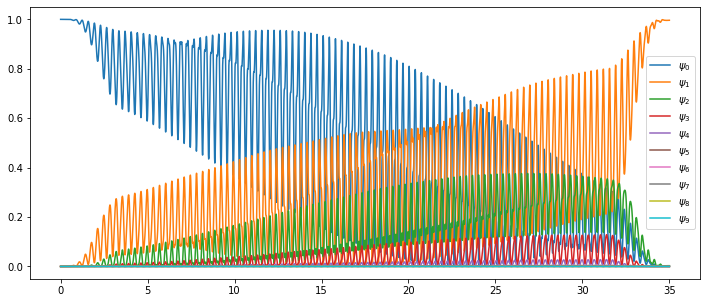

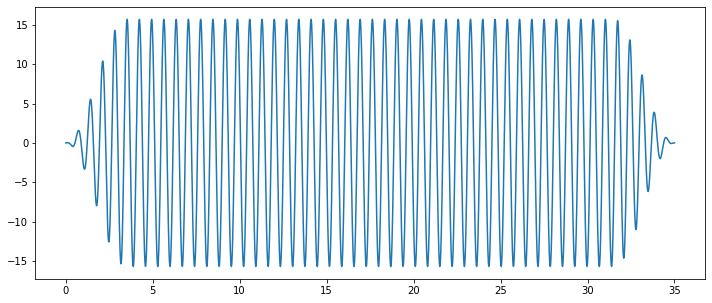

In [16]:
expectation_values = expect.get_all_expectation_values(solution.states, system.basis_states)
fig, ax = plt.subplots(figsize=(12, 5))
for i in range(0, len(expectation_values)):
    ax.plot(tlist, expectation_values[i], label="$\psi_{%i}$" % i)
plt.legend()
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(tlist, pulse_gen.get_pulse(tlist))

In [9]:
from qutip.parallel import parallel_map as parallel_map
from qutip.parallel import parfor as parfor
all_results = []
_amp = 2.5 * 2 * np.pi
_off = 0
_dur = 35

# Vary Offset

In [10]:
def vary_offset(off):
    tlist = np.linspace(0, _dur, int(_dur*2))
    pulse_gen.setup(amplitude=_amp, drive_frequency= system.first_energy_spacing/3 - off, ramp_coef=0.2, tlist=tlist)
    solution = solver.time_evolve(H_d=system.H0, H_c=system.H1, pertubation_func=pulse_gen.pulse_func, tlist=tlist, starting_state=system.basis_states[0], pbar=False)
    expectation_values = expect.get_all_expectation_values(solution.states, system.basis_states)
    return {
        "fidelity": expectation_values[1][-1],
        "offset": off,
        "frequency":  system.first_energy_spacing/3 - off,
        "duration": _dur,
        "amplitude": _amp
    }

offs_to_test = np.linspace(0, 1, 50)
offset_varying_results = parfor(vary_offset, offs_to_test)

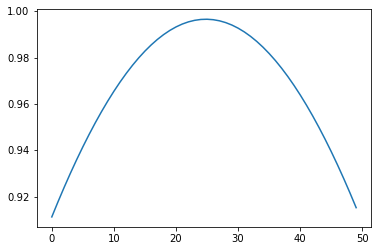

In [13]:
_fids_off_sweep = []
for result in offset_varying_results:
    _fids_off_sweep.append(result["fidelity"])

plt.plot(_fids_off_sweep)
plt.show()
best_offset = offset_varying_results[np.argmax(_fids_off_sweep)]["offset"]
offs_to_test = np.linspace(best_offset-0.01, best_offset+0.01, 50)
offset_varying_results = parfor(vary_offset, offs_to_test)

In [14]:
offset_varying_results[np.argmax(_fids_off_sweep)]

{'fidelity': 0.9964224253908577,
 'offset': 0.20061224489795917,
 'frequency': 8.91000645051244,
 'duration': 35,
 'amplitude': 15.707963267948966}

# Fidelity Landscape

In [52]:
def run_once(dur):
    tlist = np.linspace(0, dur, int(dur*2))
    pulse_gen.setup(amplitude=_amp, drive_frequency= system.first_energy_spacing/3 - _off, ramp_coef=0.5, tlist=tlist)
    solution = solver.time_evolve(H_d=system.H0, H_c=system.H1, pertubation_func=pulse_gen.pulse_func, tlist=tlist, starting_state=system.basis_states[0], pbar=False)
    expectation_values = expect.get_all_expectation_values(solution.states, system.basis_states)
    return {
        "fidelity": expectation_values[1][-1],
        "offset": _off,
        "frequency":  system.first_energy_spacing/3 - off,
        "duration": dur,
        "amplitude": _amp
    }

for off in np.linspace(0.05, 0.15, 50):
    print(off)
    _off = off
    already_did_this_offset = False
    for grouping in all_results:
        for result in grouping:
            if result["offset"] == _off:
                already_did_this_offset = True
                break
    if already_did_this_offset:
        continue

    all_results.append(parallel_map(run_once, np.linspace(1, 2000, 50))) # , progress_bar=True

0.05
0.05204081632653061
0.05408163265306123
0.05612244897959184
0.05816326530612245
0.06020408163265306
0.06224489795918367
0.06428571428571428
0.0663265306122449
0.06836734693877551
0.07040816326530612
0.07244897959183674
0.07448979591836735
0.07653061224489796
0.07857142857142857
0.08061224489795918
0.08265306122448979
0.0846938775510204
0.08673469387755102
0.08877551020408163
0.09081632653061225
0.09285714285714286
0.09489795918367347
0.09693877551020408
0.09897959183673469
0.1010204081632653
0.1030612244897959
0.10510204081632653
0.10714285714285714
0.10918367346938776
0.11122448979591837
0.11326530612244898
0.11530612244897959
0.1173469387755102
0.1193877551020408
0.12142857142857143
0.12346938775510204
0.12551020408163266
0.12755102040816324
0.12959183673469388
0.13163265306122449
0.1336734693877551
0.1357142857142857
0.1377551020408163
0.13979591836734695
0.14183673469387753
0.14387755102040817
0.14591836734693875
0.14795918367346939
0.15


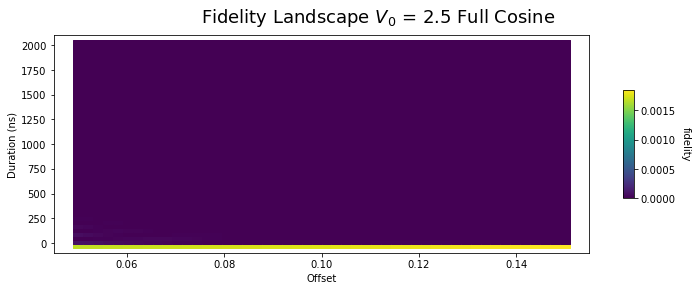

In [55]:
import copy
# %matplotlib widget

amps = []
offs = []
durs = []
fids = []
all_results_to_graph = copy.deepcopy(all_results)
for grouping in all_results_to_graph:
    for result in grouping:
        amps.append(result["amplitude"])
        offs.append(result["offset"])
        durs.append(result["duration"])
        fids.append(result["fidelity"])

fig, axs = plt.subplots(figsize=(12, 4))
fig.suptitle("Fidelity Landscape $V_0$ = %.1f Full Cosine" % amps[-1], fontsize=18)
axs.set_xlabel("Offset")
axs.set_ylabel("Duration (ns)")
surf = axs.scatter(offs, np.array(durs), c=fids, cmap=None, marker="s", s=100)
cbar = fig.colorbar(surf, shrink=0.5, aspect=10)
cbar.ax.set_ylabel("fidelity", rotation=270)
cbar.ax.get_yaxis().labelpad = 15
# axs.pcolormesh(offs, durs, fids)